# New Notebook

Whats this notebook about?

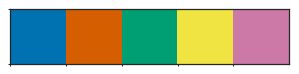

In [29]:
import sys
import os
from glob import glob
import re
import random

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from g4netx import g4netx
import pyBigWig as pybw
from pysam import FastaFile
from ushuffle import shuffle as seq_shuffle

## Default plotting params

%matplotlib inline
sns.set(font='Arial')
plt.rcParams['svg.fonttype'] = 'none'
style = sns.axes_style('white')
style.update(sns.axes_style('ticks'))
style['xtick.major.size'] = 2
style['ytick.major.size'] = 2
sns.set(font_scale=2, style=style)
pal = sns.color_palette(['#0072b2', '#d55e00', '#009e73', '#f0e442', '#cc79a7'])
cmap = ListedColormap(pal.as_hex())
sns.set_palette(pal)
sns.palplot(pal)
plt.show()

In [47]:
!mkdir shuffled_genomes

In [48]:
with FastaFile('/home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa') as fasta:
    for i in range(10):
        print(i)
        with open('./shuffled_genomes/tair10_shuf{}.fasta'.format(i), 'w') as out, \
                open('./shuffled_genomes/tair10_dinucl_shuf{}.fasta'.format(i), 'w') as outd:
            for ref in fasta.references:
                seq = fasta.fetch(ref)
                shuffled_seq = []
                dinucl_shuffled_seq = []
                for i in range(0, len(seq), 20):
                    shuffled_seq.append(seq_shuffle(seq[i: i + 20], 20, 1))
                    dinucl_shuffled_seq.append(seq_shuffle(seq[i: i + 20], 20, 2))
                shuffled_seq = ''.join(shuffled_seq)
                dinucl_shuffled_seq = ''.join(dinucl_shuffled_seq)
                out.write('>' + ref + '\n')
                outd.write('>' + ref + '\n')
                out.write(shuffled_seq + '\n')
                outd.write(dinucl_shuffled_seq + '\n')

0
1
2
3
4
5
6
7
8
9


In [ ]:
%%bash
source activate jupyter_python3
bedtools makewindows -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes -w 20 -s 20 | 
bedtools nuc -fi /home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa -bed stdin |
grep -v "^#" |
awk -v OFS='\t' '{print $1,$2,$3,$8/20,$7/20}' > \
tair10_gc.bed

cut -f1-4 tair10_gc.bed > tair10_gc_pos.bdg
cut -f1-3,5 tair10_gc.bed > tair10_gc_neg.bdg

bedGraphToBigWig \
  tair10_gc_pos.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_gc_pos.bw

bedGraphToBigWig \
  tair10_gc_neg.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_gc_neg.bw

In [49]:
%%bash
source activate jupyter_python3

cd shuffled_genomes

for FASTA in *.fasta;
do
  GC="${FASTA%%.fasta}_gc.bdg"
  bedtools makewindows -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes -w 20 -s 20 | 
  bedtools nuc -fi $FASTA -bed stdin |
  grep -v "^#" |
  awk -v OFS='\t' '{print $1,$2,$3,$8/20,$7/20}' > $GC
  cut -f1-4 $GC > "${GC%%.bdg}_pos.bdg"
  cut -f1-3,5 $GC > "${GC%%.bdg}_neg.bdg"
  bedGraphToBigWig \
    "${GC%%.bdg}_pos.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${GC%%.bdg}_pos.bw"
  bedGraphToBigWig \
    "${GC%%.bdg}_neg.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${GC%%.bdg}_neg.bw"
  rm *.bdg
done

index file tair10_dinucl_shuf0.fasta.fai not found, generating...
index file tair10_dinucl_shuf1.fasta.fai not found, generating...
index file tair10_dinucl_shuf2.fasta.fai not found, generating...
index file tair10_dinucl_shuf3.fasta.fai not found, generating...
index file tair10_dinucl_shuf4.fasta.fai not found, generating...
index file tair10_dinucl_shuf5.fasta.fai not found, generating...
index file tair10_dinucl_shuf6.fasta.fai not found, generating...
index file tair10_dinucl_shuf7.fasta.fai not found, generating...
index file tair10_dinucl_shuf8.fasta.fai not found, generating...
index file tair10_dinucl_shuf9.fasta.fai not found, generating...
index file tair10_shuf0.fasta.fai not found, generating...
Feature (1:30427660-30427671) beyond the length of 1 size (30427660 bp).  Skipping.
Feature (2:19698280-19698289) beyond the length of 2 size (19698280 bp).  Skipping.
Feature (3:23459820-23459830) beyond the length of 3 size (23459820 bp).  Skipping.
Feature (4:18585040-18585056)

In [73]:
%%bash
source activate ml_python35

g4netx -i 2 -j 2 -l 7 \
    -f /home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa \
    -b tair10_2t_g4_overlapping.bed
awk '$6 == "+"' tair10_2t_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_2t_g4_overlapping_pos.bdg
awk '$6 == "-"' tair10_2t_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_2t_g4_overlapping_neg.bdg

In [74]:
%%bash
source activate ml_python35

g4netx -i 3 -j 6 \
    -f /home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa \
    -b tair10_3t_plus_g4_overlapping.bed
awk '$6 == "+"' tair10_3t_plus_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_3t_plus_g4_overlapping_pos.bdg
awk '$6 == "-"' tair10_3t_plus_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_3t_plus_g4_overlapping_neg.bdg

In [75]:
%%bash
source activate ml_python35

g4netx -i 3 -j 6 -u 2 -l 7 \
    -f /home/matthew/Documents/genomes/tair10/fasta/tair10_genome.fa \
    -b tair10_3t_plus_bulged_g4_overlapping.bed
awk '$6 == "+"' tair10_3t_plus_bulged_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_3t_plus_bulged_g4_overlapping_pos.bdg
awk '$6 == "-"' tair10_3t_plus_bulged_g4_overlapping.bed |
bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
> tair10_3t_plus_bulged_g4_overlapping_neg.bdg

bedGraphToBigWig \
  tair10_2t_g4_overlapping_pos.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_2t_g4_overlapping_pos.bw

bedGraphToBigWig \
  tair10_2t_g4_overlapping_neg.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_2t_g4_overlapping_neg.bw

bedGraphToBigWig \
  tair10_3t_plus_g4_overlapping_pos.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_3t_plus_g4_overlapping_pos.bw

bedGraphToBigWig \
  tair10_3t_plus_g4_overlapping_neg.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_3t_plus_g4_overlapping_neg.bw

bedGraphToBigWig \
  tair10_3t_plus_bulged_g4_overlapping_pos.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_3t_plus_bulged_g4_overlapping_pos.bw

bedGraphToBigWig \
  tair10_3t_plus_bulged_g4_overlapping_neg.bdg \
  /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  tair10_3t_plus_bulged_g4_overlapping_neg.bw

In [53]:
%%bash
source activate ml_python35

cd shuffled_genomes

for FASTA in *.fasta;
do
  g4netx -i 2 -j 2 -l 7 \
    -f $FASTA \
    -b "${FASTA%%.fasta}_2t_g4_overlapping.bdg"
  awk '$6 == "+"' "${FASTA%%.fasta}_2t_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_2t_g4_overlapping_pos.bdg"
  awk '$6 == "-"' "${FASTA%%.fasta}_2t_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_2t_g4_overlapping_neg.bdg"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_2t_g4_overlapping_pos.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_2t_g4_overlapping_pos.bw"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_2t_g4_overlapping_neg.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_2t_g4_overlapping_neg.bw"
  rm *.bdg
  g4netx -i 3 -j 6 -l 7 \
    -f $FASTA \
    -b "${FASTA%%.fasta}_3t_g4_overlapping.bdg"
  awk '$6 == "+"' "${FASTA%%.fasta}_3t_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_3t_g4_overlapping_pos.bdg"
  awk '$6 == "-"' "${FASTA%%.fasta}_3t_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_3t_g4_overlapping_neg.bdg"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_3t_g4_overlapping_pos.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_3t_g4_overlapping_pos.bw"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_3t_g4_overlapping_neg.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_3t_g4_overlapping_neg.bw"
  rm *.bdg
  g4netx -i 3 -j 6 -u 2 -l 7 \
    -f $FASTA \
    -b "${FASTA%%.fasta}_3tb_g4_overlapping.bdg"
  awk '$6 == "+"' "${FASTA%%.fasta}_3tb_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_3tb_g4_overlapping_pos.bdg"
  awk '$6 == "-"' "${FASTA%%.fasta}_3tb_g4_overlapping.bdg" |
  bedtools genomecov -bg -i stdin -g /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
  > "${FASTA%%.fasta}_3tb_g4_overlapping_neg.bdg"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_3tb_g4_overlapping_pos.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_3tb_g4_overlapping_pos.bw"
  bedGraphToBigWig \
    "${FASTA%%.fasta}_3tb_g4_overlapping_neg.bdg" \
    /home/matthew/Documents/genomes/tair10/tair10.chrom.sizes \
    "${FASTA%%.fasta}_3tb_g4_overlapping_neg.bw"
  rm *.bdg
done

In [76]:
def get_chrom_sizes(csf):
    cs = {}
    with open(csf) as f:
        for record in f:
            record = record.split()
            cs[record[0]] = int(record[1])
    return cs


def tss_profile(pos_bw, neg_bw, bed_file, chrom_sizes_file, size=500):
    chrom_sizes = get_chrom_sizes(chrom_sizes_file)
    pos_profiles = []
    neg_profiles = []
    with open(bed_file) as f:
        for record in f:
            record = record.strip().split('\t')
            start, end = int(record[1]), int(record[2])
            chrom = record[0]
            strand = record[5]
            cds_start, cds_end = int(record[6]), int(record[7])
            if cds_start == cds_end:
                # not protein coding
                continue
            try:
                if strand == '+':
                    pos = pos_bw.values(chrom, max(0, start - size), min(chrom_sizes[chrom], start + size))
                    neg = neg_bw.values(chrom, max(0, start - size), min(chrom_sizes[chrom], start + size))
                    if start - size < 0:
                        pos = [0,] * (size - start) + pos
                        neg = [0,] * (size - start) + neg
                    elif start + size > chrom_sizes[chrom]:
                        pos = pos + [0,] * (start + size - chrom_sizes[chrom])
                        neg = neg + [0,] * (start + size - chrom_sizes[chrom])
                elif strand == '-':
                    pos = neg_bw.values(chrom, max(0, end - size), min(chrom_sizes[chrom], end + size))
                    neg = pos_bw.values(chrom, max(0, end - size), min(chrom_sizes[chrom], end + size))
                    if end - size < 0:
                        pos = [0,] * (size - end) + pos
                        neg = [0,] * (size - end) + neg
                    elif end + size > chrom_sizes[chrom]:
                        pos = pos + [0,] * (end + size - chrom_sizes[chrom])
                        neg = neg + [0,] * (end + size - chrom_sizes[chrom])
                    pos = pos[::-1]
                    neg = neg[::-1]
            except KeyError:
                continue
            pos = np.array([x if x is not None else 0 for x in pos])
            neg = np.array([x if x is not None else 0 for x in neg])
            pos[np.isnan(pos)] = 0
            neg[np.isnan(neg)] = 0
            pos_profiles.append(pos)
            neg_profiles.append(neg)
    return np.array(pos_profiles), np.array(neg_profiles)


def tts_profile(pos_bw, neg_bw, bed_file, chrom_sizes_file, size=500):
    chrom_sizes = get_chrom_sizes(chrom_sizes_file)
    pos_profiles = []
    neg_profiles = []
    with open(bed_file) as f:
        for record in f:
            record = record.strip().split('\t')
            start, end = int(record[1]), int(record[2])
            chrom = record[0]
            strand = record[5]
            cds_start, cds_end = int(record[6]), int(record[7])
            if cds_start == cds_end:
                # not protein coding
                continue
            try:
                if strand == '+':
                    pos = pos_bw.values(chrom, max(0, end - size), min(chrom_sizes[chrom], end + size))
                    neg = neg_bw.values(chrom, max(0, end - size), min(chrom_sizes[chrom], end + size))
                    if end - size < 0:
                        pos = [0,] * (size - end) + pos
                        neg = [0,] * (size - end) + neg
                    elif end + size > chrom_sizes[chrom]:
                        pos = pos + [0,] * (end + size - chrom_sizes[chrom])
                        neg = neg + [0,] * (end + size - chrom_sizes[chrom])
                elif strand == '-':
                    pos = neg_bw.values(chrom, max(0, start - size), min(chrom_sizes[chrom], start + size))
                    neg = pos_bw.values(chrom, max(0, start - size), min(chrom_sizes[chrom], start + size))
                    if start - size < 0:
                        pos = [0,] * (size - start) + pos
                        neg = [0,] * (size - start) + neg
                    elif start + size > chrom_sizes[chrom]:
                        pos = pos + [0,] * (start + size - chrom_sizes[chrom])
                        neg = neg + [0,] * (start + size - chrom_sizes[chrom])
                    pos = pos[::-1]
                    neg = neg[::-1]
            except KeyError:
                continue
            pos = np.array([x if x is not None else 0 for x in pos])
            neg = np.array([x if x is not None else 0 for x in neg])
            pos[np.isnan(pos)] = 0
            neg[np.isnan(neg)] = 0
            pos_profiles.append(pos)
            neg_profiles.append(neg)
    return np.array(pos_profiles), np.array(neg_profiles)


def reinterpolate(scores, n_points):
    if len(scores) == 0:
        return np.zeros(shape=n_points)
    x = np.linspace(0, 1, n_points)
    xp = np.linspace(0, 1, len(scores))
    return np.interp(x, xp, scores)


def gene_profile(pos_bw_glob, neg_bw_glob, bed_file, chrom_sizes_file, size=500):
    pos_bws = [pybw.open(x) for x in glob(pos_bw_glob)]
    neg_bws = [pybw.open(x) for x in glob(neg_bw_glob)]
    chrom_sizes = get_chrom_sizes(chrom_sizes_file)
    pos_profiles = []
    neg_profiles = []
    
    with open(bed_file) as f:
        for record in f:
            record = record.strip().split('\t')
            start, end = int(record[1]), int(record[2])
            cds_start, cds_end = int(record[6]), int(record[7])
            if cds_start == cds_end:
                # not protein coding
                continue
            chrom = record[0]
            strand = record[5]
            gene_pos_profiles = []
            gene_neg_profiles = []
            for pos_bw, neg_bw in zip(pos_bws, neg_bws):
                try:
                    if strand == '+':
                        upstream_pos = pos_bw.values(chrom, max(0, start - size), start)
                        upstream_neg = neg_bw.values(chrom, max(0, start - size), start)
                        if len(upstream_pos) != size:
                            upstream_pos = [0,] * (size - start) + upstream_pos
                            upstream_neg = [0,] * (size - start) + upstream_neg
                        if start != cds_start:
                            utr5_pos = pos_bw.values(chrom, start, cds_start)
                            utr5_neg = neg_bw.values(chrom, start, cds_start)
                        else:
                            utr5_pos = []
                            utr5_neg = []
                        cds_pos = pos_bw.values(chrom, cds_start, cds_end)
                        cds_neg = neg_bw.values(chrom, cds_start, cds_end)
                        if cds_end != end:
                            utr3_pos = pos_bw.values(chrom, cds_end, end)
                            utr3_neg = neg_bw.values(chrom, cds_end, end)
                        else:
                            utr3_pos = []
                            utr3_neg = []
                        downstream_pos = pos_bw.values(chrom, end, min(chrom_sizes[chrom], end + size))
                        downstream_neg = neg_bw.values(chrom, end, min(chrom_sizes[chrom], end + size))
                        if len(downstream_pos) != size:
                            downstream_pos = downstream_pos + [0,] * (end + size - chrom_sizes[chrom])
                            downstream_neg = downstream_neg + [0,] * (end + size - chrom_sizes[chrom])
                    elif strand == '-':
                        upstream_neg = pos_bw.values(chrom, end, min(chrom_sizes[chrom], end + size))
                        upstream_pos = neg_bw.values(chrom, end, min(chrom_sizes[chrom], end + size))
                        if len(upstream_pos) != size:
                            upstream_pos = upstream_pos + [0,] * (end + size - chrom_sizes[chrom])
                            upstream_neg = upstream_neg + [0,] * (end + size - chrom_sizes[chrom])
                        upstream_pos = upstream_pos[::-1]
                        upstream_neg = upstream_neg[::-1]
                        if start != cds_start:
                            utr3_pos = neg_bw.values(chrom, start, cds_start)[::-1]
                            utr3_neg = pos_bw.values(chrom, start, cds_start)[::-1]
                        else:
                            utr3_pos = []
                            utr5_pos = []
                        cds_pos = neg_bw.values(chrom, cds_start, cds_end)[::-1]
                        cds_neg = pos_bw.values(chrom, cds_start, cds_end)[::-1]
                        if cds_end != end:
                            utr5_pos = neg_bw.values(chrom, cds_end, end)[::-1]
                            utr5_neg = pos_bw.values(chrom, cds_end, end)[::-1]
                        else:
                            utr5_pos = []
                            utr5_neg = []
                        downstream_neg = pos_bw.values(chrom, max(0, start - size), start)
                        downstream_pos = neg_bw.values(chrom, max(0, start - size), start)
                        if len(downstream_pos) != size:
                            downstream_pos = [0,] * (size - start) + downstream_pos
                            downstream_neg = [0,] * (size - start) + downstream_neg
                        downstream_pos = downstream_pos[::-1]
                        downstream_neg = downstream_neg[::-1]
                except KeyError:
                    continue
                upstream_pos = np.array([x if x is not None else 0 for x in upstream_pos])
                upstream_neg = np.array([x if x is not None else 0 for x in upstream_neg])
                utr5_pos = np.array([x if x is not None else 0 for x in utr5_pos])
                utr5_neg = np.array([x if x is not None else 0 for x in utr5_neg])
                cds_pos = np.array([x if x is not None else 0 for x in cds_pos])
                cds_neg = np.array([x if x is not None else 0 for x in cds_neg])
                utr3_pos = np.array([x if x is not None else 0 for x in utr3_pos])
                utr3_neg = np.array([x if x is not None else 0 for x in utr3_neg])
                downstream_pos = np.array([x if x is not None else 0 for x in upstream_pos])
                downstream_neg = np.array([x if x is not None else 0 for x in upstream_neg])
                upstream_pos[np.isnan(upstream_pos)] = 0
                upstream_neg[np.isnan(upstream_neg)] = 0
                utr5_pos[np.isnan(utr5_pos)] = 0
                utr5_neg[np.isnan(utr5_neg)] = 0
                cds_pos[np.isnan(cds_pos)] = 0
                cds_neg[np.isnan(cds_neg)] = 0
                utr3_pos[np.isnan(utr3_pos)] = 0
                utr3_neg[np.isnan(utr3_neg)] = 0
                downstream_pos[np.isnan(downstream_pos)] = 0
                downstream_neg[np.isnan(downstream_neg)] = 0
                gene_pos_profiles.append(np.concatenate([
                    reinterpolate(upstream_pos, 50),
                    reinterpolate(utr5_pos, 20),
                    reinterpolate(cds_pos, 100),
                    reinterpolate(utr3_pos, 20),
                    reinterpolate(downstream_pos, 50),
                ]))
                gene_neg_profiles.append(np.concatenate([
                    reinterpolate(upstream_neg, 50),
                    reinterpolate(utr5_neg, 20),
                    reinterpolate(cds_neg, 100),
                    reinterpolate(utr3_neg, 20),
                    reinterpolate(downstream_neg, 50),
                ]))
            pos_profiles.append(gene_pos_profiles)
            neg_profiles.append(gene_neg_profiles)
    return np.array(pos_profiles), np.array(neg_profiles)

In [258]:
%%bash
source activate cgat_python2

cat <(
cgat gtf2gtf --method=merge-exons --filter=proteincoding --mark-utr \
  -I /home/matthew/Documents/genomes/tair10/gff/Araport11_GFF3_genes_transposons.201606.gtf \
  -L /dev/null | sed -e 's/UTR5/5UTR/' -e 's/UTR3/3UTR/'
) <(
cgat gtf2gtf --method=merge-exons --filter=proteincoding \
  -I /home/matthew/Documents/genomes/tair10/gff/Araport11_GFF3_genes_transposons.201606.gtf \
  -L /dev/null
) | sed -e 's/transcript_id "merged";//' -e 's/gene_id/transcript_id/' |
sort -k1,1 -k4,4n > araport_merged.gtf
perl gtf2bed12.pl araport_merged.gtf > araport_genes.bed

In [78]:
pos_gene_profiles_gc, neg_gene_profiles_gc = gene_profile(
    'tair10_gc_pos.bw', 'tair10_gc_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

sim_pos_gene_profiles_gc, sim_neg_gene_profiles_gc = gene_profile(
    'shuffled_genomes/tair10_dinucl_shuf*_gc_pos.bw',
    'shuffled_genomes/tair10_dinucl_shuf*_gc_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

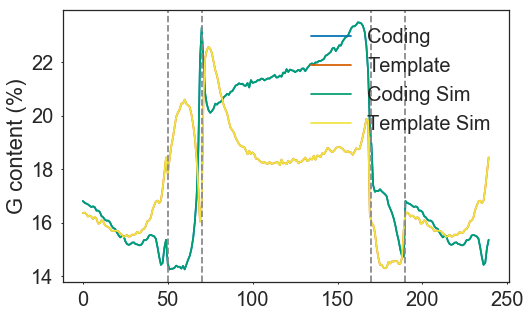

In [79]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel('G content (%)')
ax.plot(np.mean(pos_gene_profiles_gc.squeeze() * 100, axis=0), label='Coding')
ax.plot(np.mean(neg_gene_profiles_gc.squeeze() * 100, axis=0), label='Template')
ax.plot(np.mean(sim_pos_gene_profiles_gc * 100, axis=(0, 1)), label='Coding Sim')
ax.plot(np.mean(sim_neg_gene_profiles_gc * 100, axis=(0, 1)), label='Template Sim')
ax.legend(loc=1)
for x in [50, 70, 170, 190]:
    ax.axvline(x, c='#888888', ls='--')
ax.legend(loc=1)

In [86]:
pos_gene_profiles_2t, neg_gene_profiles_2t = gene_profile(
    'tair10_2t_g4_overlapping_pos.bw', 'tair10_2t_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

sim_pos_gene_profiles_2t, sim_neg_gene_profiles_2t = gene_profile(
    'shuffled_genomes/tair10_dinucl_shuf*_2t_g4_overlapping_pos.bw',
    'shuffled_genomes/tair10_dinucl_shuf*_2t_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

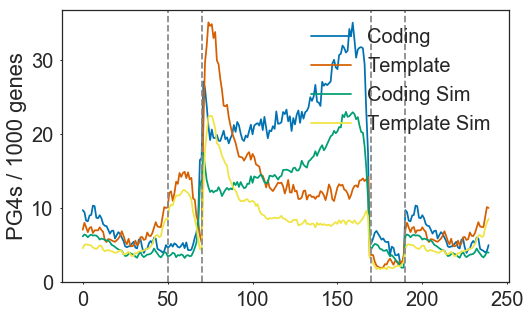

In [87]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_ylabel('PG4s / 1000 genes')
ax.plot(np.mean(pos_gene_profiles_2t.squeeze().astype(bool), axis=0) * 1000, label='Coding')
ax.plot(np.mean(neg_gene_profiles_2t.squeeze().astype(bool), axis=0) * 1000, label='Template')
ax.plot(np.mean(sim_pos_gene_profiles_2t.astype(bool), axis=(0, 1)) * 1000, label='Coding Sim')
ax.plot(np.mean(sim_neg_gene_profiles_2t.astype(bool), axis=(0, 1)) * 1000, label='Template Sim')
ax.legend(loc=1)
for x in [50, 70, 170, 190]:
    ax.axvline(x, c='#888888', ls='--')
ax.legend(loc=1)

In [111]:
pos_gene_profiles_3t, neg_gene_profiles_3t = gene_profile(
    'tair10_3t_plus_g4_overlapping_pos.bw',
    'tair10_3t_plus_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

In [88]:
sim_pos_gene_profiles_3t, sim_neg_gene_profiles_3t = gene_profile(
    'shuffled_genomes/tair10_dinucl_shuf*_3t_g4_overlapping_pos.bw',
    'shuffled_genomes/tair10_dinucl_shuf*_3t_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

In [103]:
pos_gene_profiles_3tb, neg_gene_profiles_3tb = gene_profile(
    'tair10_3t_plus_bulged_g4_overlapping_pos.bw',
    'tair10_3t_plus_bulged_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

In [89]:
sim_pos_gene_profiles_3tb, sim_neg_gene_profiles_3tb = gene_profile(
    'shuffled_genomes/tair10_dinucl_shuf*_3tb_g4_overlapping_pos.bw',
    'shuffled_genomes/tair10_dinucl_shuf*_3tb_g4_overlapping_neg.bw',
    'araport_genes.bed',
    '/home/matthew/Documents/genomes/tair10/tair10.chrom.sizes'
)

In [93]:
sim_pos_gene_profiles_3t.shape

(24504, 10, 240)

In [91]:
import itertools as it

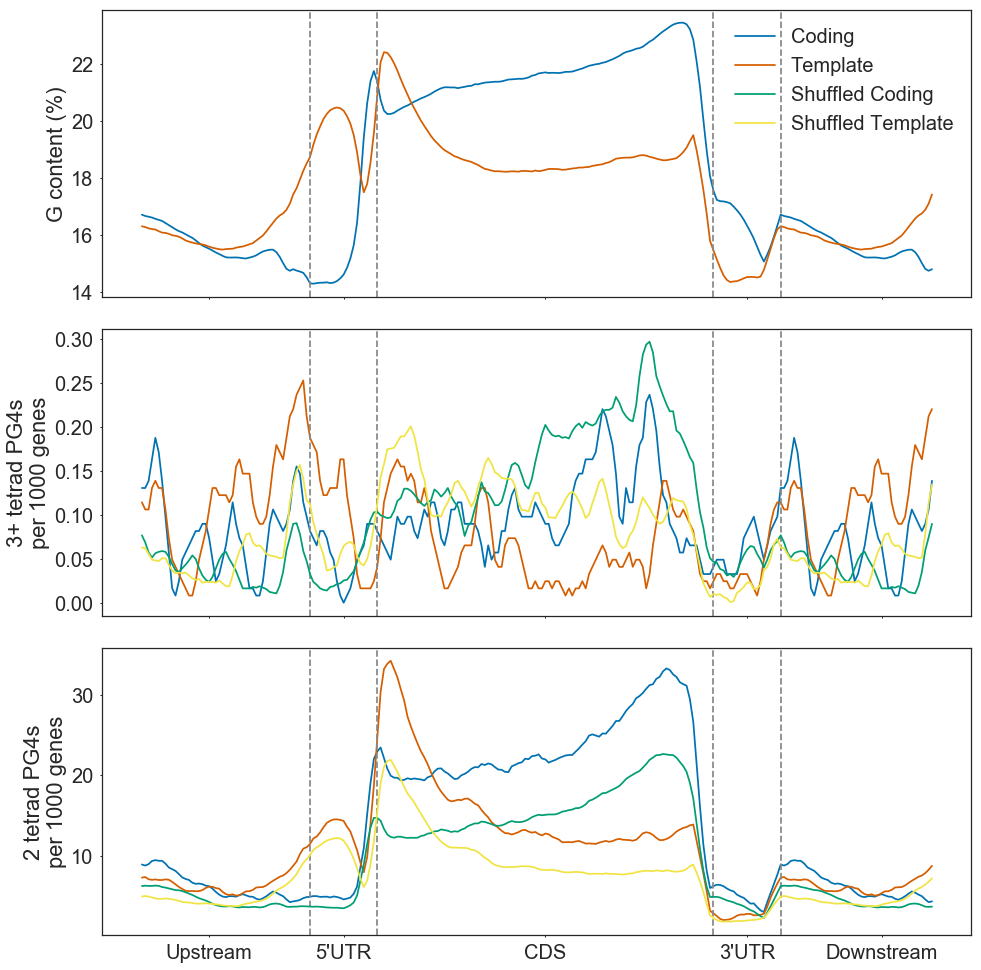

In [120]:
pos_gc_mean = np.mean(pos_gene_profiles_gc.squeeze() * 100, axis=0)
neg_gc_mean = np.mean(neg_gene_profiles_gc.squeeze() * 100, axis=0)

pos_2t_mean = np.mean(pos_gene_profiles_2t.squeeze().astype(bool), axis=0) * 1000
neg_2t_mean = np.mean(neg_gene_profiles_2t.squeeze().astype(bool), axis=0) * 1000
sim_pos_2t_mean = np.mean(sim_pos_gene_profiles_2t.astype(bool), axis=(0, 1)) * 1000
sim_neg_2t_mean = np.mean(sim_neg_gene_profiles_2t.astype(bool), axis=(0, 1)) * 1000

pos_3t_mean = np.mean(pos_gene_profiles_3t.squeeze().astype(bool), axis=0) * 1000
neg_3t_mean = np.mean(neg_gene_profiles_3t.squeeze().astype(bool), axis=0) * 1000
sim_pos_3t_mean = np.mean(sim_pos_gene_profiles_3t.astype(bool), axis=(0, 1)) * 1000
sim_neg_3t_mean = np.mean(sim_neg_gene_profiles_3t.astype(bool), axis=(0, 1)) * 1000

def running_mean(x, N):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

fig, ax = plt.subplots(figsize=(14,14), nrows=3, sharex=True, sharey=False)
#ax[1].get_shared_y_axes().join(ax[1], ax[2])
ax[0].set_ylabel('G content (%)')
ax[0].plot(running_mean(pos_gc_mean, 5), label='Coding', c=pal[0])
ax[0].plot(running_mean(neg_gc_mean, 5), label='Template', c=pal[1])
ax[0].plot([], label='Shuffled Coding', c=pal[2])
ax[0].plot([], label='Shuffled Template', c=pal[3])
ax[0].legend(loc=1)
for x in [50, 70, 170, 190]:
    ax[0].axvline(x, c='#888888', ls='--')
ax[0].legend(loc=1)
ax[1].set_ylabel('3+ tetrad PG4s\nper 1000 genes')
ax[1].plot(running_mean(pos_3t_mean, 5), zorder=2, c=pal[0])
ax[1].plot(running_mean(neg_3t_mean, 5), zorder=2, c=pal[1])
ax[1].plot(running_mean(sim_pos_3t_mean, 5), zorder=3, c=pal[2])
ax[1].plot(running_mean(sim_neg_3t_mean, 5), zorder=3, c=pal[3])
for x in [50, 70, 170, 190]:
    ax[1].axvline(x, c='#888888', ls='--')
ax[2].set_ylabel('2 tetrad PG4s\nper 1000 genes')
ax[2].plot(running_mean(pos_2t_mean, 5), zorder=2, c=pal[0])
ax[2].plot(running_mean(neg_2t_mean, 5), zorder=2, c=pal[1])
ax[2].plot(running_mean(sim_pos_2t_mean, 5), zorder=3, c=pal[2])
ax[2].plot(running_mean(sim_neg_2t_mean, 5), zorder=3, c=pal[3])
for x in [50, 70, 170, 190]:
    ax[2].axvline(x, c='#888888', ls='--')
ax[2].set_xticks([20, 60, 120, 180, 220])
ax[2].set_xticklabels(['Upstream', '5\'UTR', 'CDS', '3\'UTR', 'Downstream'])
plt.tight_layout()
plt.savefig('gc_and_pg4_content.svg')
plt.show()